In [25]:
from scipy.misc import derivative
import scipy.integrate
from math import *
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
import random
from sklearn.datasets.samples_generator import make_regression 
from scipy import stats
import seaborn as sns

In [2]:
def f1(x):
    return sin(x) * cos(x) + exp(2*x) + 2*x**4 - 10

In [3]:
f1_result = derivative(f1, 2, dx = 1e-10)
f1_result

172.5426557186438

In [4]:
def f2(x):
    return (5*(x**2))/sin(x)

In [5]:
f2_result = derivative(f2, 2, dx = 1e-10)
f2_result

32.06119814080921

## Partial Derivative

In [7]:
x = sp.Symbol('x')
y = sp.Symbol('y')
z = sp.Symbol('z')

In [8]:
w = (x**2)*y - 10*(y**2)*(z**3) + 43*x - 7*sp.tan(4*y)

In [9]:
w_p = sp.diff(w, x)
w_p

2*x*y + 43

In [10]:
w_p_v = w_p.subs({x:3})
w_p_v

6*y + 43

## Derivarive Rule

In [15]:
def f(x):
    return 4*(x**3) + 3*(x**2)
def g(x):
    return 5*(x**6) + 4*x

In [16]:
x = 2
fg_prime_of_x = derivative(f, x, dx=1e-10)*g(x) + f(x)*derivative(g, x, dx=1e-10)
fg_prime_of_x

62096.008264234115

In [17]:
f_prime_g_prime_of_x = derivative(f, x, dx=1e-10) * derivative(g, x, dx=1e-10)
f_prime_g_prime_of_x

57840.01383466328

## Definite Integral

In [19]:
f = lambda x,y: 1 + 8*x*y
g = lambda x:0
h = lambda x:3

In [20]:
i, e = scipy.integrate.dblquad(f, 1,2, g, h)
i

56.99999999999999

## Gradient Descent

In [22]:
h = [74, 74, 72, 72, 73, 69, 69, 71, 76, 71, 73, 73, 74, 74, 69, 70, 73, 75, 78, 79, 76, 74, 76, 72, 71, 75, 77, 74, 73, 74, 78, 73, 75, 73, 75, 75, 74, 69, 71, 74, 73, 73, 76, 74, 74, 70, 72, 77, 74, 70, 73, 75, 76, 76, 78, 74, 74, 76, 77, 81, 78, 75, 77, 75, 76, 74, 72, 72, 75, 73,  73, 73, 70, 70, 70, 76, 68, 71, 72, 75, 75, 75, 75, 68, 74, 78, 71, 73, 76, 74, 74, 79, 75, 73, 76, 74, 74, 73, 72, 74, 73, 74, 72, 73, 69, 72, 73, 75, 75, 73, 72, 72, 76, 74, 72, 77, 74, 77, 75, 76, 80, 74, 74, 75, 78, 73, 73, 74, 75, 76, 71, 73, 74, 76, 76, 74, 73, 74, 70, 72,  73, 73, 73, 73, 71, 74, 74, 72, 74, 71, 74, 73, 75, 75, 79, 73, 75, 76, 74, 76, 78, 74, 76, 72, 74, 76, 74, 75, 78, 75, 72, 74, 72, 74, 70, 71, 70, 75, 71, 71, 73, 72, 71, 73, 72, 75, 74, 74, 75, 73, 77, 73, 76, 75, 74, 76, 75, 73, 71, 76, 75, 72, 71, 77, 73, 74, 71, 72, 74, 75,    73, 72, 75, 75, 74, 72, 74, 71, 70, 74, 77, 77, 75, 75, 78, 75, 76, 73, 75, 75, 79, 77, 76, 71, 75, 74, 69, 71, 76, 72, 72, 70, 72, 73, 71, 72, 71, 73, 72, 73, 74, 74, 72, 75, 74, 74, 77, 75, 73, 72, 71, 74, 77, 75, 75, 75, 78, 78, 74, 76, 78, 76, 70, 72, 80, 74, 74, 71, 70, 72,    71, 74, 71, 72, 71, 74, 69, 76, 75, 75, 76, 73, 76, 73, 77, 73, 72, 72, 77, 77, 71, 74, 74, 73, 78, 75, 73, 70, 74, 72, 73, 73, 75, 75, 74, 76, 73, 74, 75, 75, 72, 73, 73, 72, 74, 78, 76, 73, 74, 75, 70, 75, 71, 72, 78, 75, 73, 73, 71, 75, 77, 72, 69, 73, 74, 72, 70, 75, 70, 72,    72, 74, 73, 74, 76, 75, 80, 72, 75, 73, 74, 74, 73, 75, 75, 71, 73, 75, 74, 74, 72, 74, 74, 74, 73, 76, 75, 72, 73, 73, 73, 72, 72, 72, 72, 71, 75, 75, 74, 73, 75, 79, 74, 76, 73, 74, 74, 72, 74, 74, 75, 78, 74, 74, 74, 77, 70, 73, 74, 73, 71, 75, 71, 72, 77, 74, 70, 77, 73, 72, 76, 71, 76, 78, 75, 73, 78, 74, 79, 75, 76, 72, 75, 75, 70, 72, 70, 74, 71, 76, 73, 76, 71, 69, 72, 72, 69, 73, 69, 73, 74, 74, 72, 71, 72, 72, 76, 76, 76, 74, 76, 75, 71, 72, 71, 73, 75, 76, 75, 71, 75, 74, 72, 73, 73, 73, 73, 76, 72, 76, 73, 73, 73, 75, 75, 77, 73, 72, 75, 70, 74, 72, 80, 71, 71, 74, 74, 73, 75, 76, 73, 77, 72, 73, 77, 76, 71, 75, 73, 74, 77, 71, 72, 73, 69, 73, 70, 74, 76, 73, 73, 75, 73, 79, 74, 73, 74, 77, 75, 74, 73, 77, 73, 77, 74, 74, 73, 77, 74, 77, 75, 77, 75, 71, 74, 70, 79, 72, 72, 70, 74, 74, 72, 73, 72, 74, 74, 76, 82, 74, 74, 70, 73, 73, 74, 77, 72, 76, 73, 73, 72, 74, 74, 71, 72, 75, 74, 74, 77, 70, 71, 73, 76, 71, 75, 74, 72, 76, 79, 76, 73, 76, 78, 75, 76, 72, 72, 73, 73, 75, 71, 76, 70, 75, 74, 75, 73, 71, 71, 72, 73, 73, 72, 69, 73, 78, 71, 73, 75, 76, 70, 74, 77, 75, 79, 72, 77, 73, 75, 75, 75, 73, 73, 76, 77, 75, 70, 71, 71, 75, 74, 69, 70, 75, 72, 75, 73, 72, 72, 72, 76, 75, 74, 69, 73, 72, 72, 75, 77, 76, 80, 77, 76, 79, 71, 75, 73, 76, 77, 73, 76, 70, 75, 73, 75, 70, 69, 71, 72, 72, 73, 70, 70, 73, 76, 75, 72, 73, 79, 71, 72, 74, 74, 74, 72, 76, 76, 72, 72, 71, 72, 72, 70, 77, 74, 72, 76, 71, 76, 71, 73, 70, 73, 73, 72, 71, 71, 71, 72, 72, 74, 74, 74, 71, 72, 75, 72, 71, 72, 72, 72, 72, 74, 74, 77, 75, 73, 75, 73, 76, 72, 77, 75, 72, 71, 71, 75, 72, 73, 73, 71, 70, 75, 71, 76, 73, 68, 71, 72, 74, 77, 72, 76, 78, 81, 72, 73, 76, 72, 72, 74, 76, 73, 76, 75, 70, 71, 74, 72, 73, 76, 76, 73, 71, 68, 71, 71, 74, 77, 69, 72, 76, 75, 76, 75, 76, 72, 74, 76, 74, 72, 75, 78, 77, 70, 72, 79, 74, 71, 68, 77, 75, 71, 72, 70, 72, 72, 73, 72, 74, 72, 72, 75, 72, 73, 74, 72, 78, 75, 72, 74, 75, 75, 76, 74, 74, 73, 74, 71, 74, 75, 76, 74, 76, 76, 73, 75, 75, 74, 68, 72, 75, 71, 70, 72, 73, 72, 75, 74, 70, 76, 71, 82, 72, 73, 74, 71, 75, 77, 72, 74, 72, 73, 78, 77, 73, 73, 73, 73, 73, 76, 75, 70, 73, 72, 73, 75, 74, 73, 73, 76, 73, 75, 70, 77, 72, 77, 74, 75, 75, 75, 75, 72, 74, 71, 76, 71, 75, 76, 83, 75, 74, 76, 72, 72, 75, 75, 72, 77, 73, 72, 70, 74, 72, 74, 72, 71, 70, 71, 76, 74, 76, 74, 74, 74, 75, 75, 71, 71, 74, 77, 71, 74, 75, 77, 76, 74, 76, 72, 71, 72, 75, 73, 68, 72, 69, 73, 73, 75, 70, 70, 74, 75, 74, 74, 73, 74, 75, 77, 73, 74, 76, 74, 75, 73, 76, 78, 75, 73, 77, 74, 72, 74, 72, 71, 73, 75, 73, 67, 67, 76, 74, 73, 70, 75, 70, 72, 77, 79, 78, 74, 75, 75, 78, 76, 75, 69, 75, 72, 75, 73, 74, 75, 75, 73]


In [23]:
w = [180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 189, 185, 219, 230, 205, 230, 195, 180, 192, 225, 203, 195, 182, 188, 200, 180, 200, 200, 245, 240, 215, 185, 175, 199, 200, 215, 200, 205, 206, 186, 188, 220, 210, 195, 200, 200, 212, 224, 210, 205, 220, 195, 200, 260, 228, 270, 200, 210, 190, 220, 180, 205, 210, 220, 211, 200, 180, 190, 170, 230, 155, 185, 185, 200, 225, 225, 220, 160, 205, 235, 250, 210, 190, 160, 200, 205, 222, 195, 205, 220, 220, 170, 185, 195, 220, 230, 180, 220, 180, 180, 170, 210, 215, 200, 213, 180, 192, 235, 185, 235, 210, 222, 210, 230, 220, 180, 190, 200, 210, 194, 180, 190, 240, 200, 198, 200, 195, 210, 220, 190, 210, 225, 180, 185, 170, 185, 185, 180, 178, 175, 200, 204, 211, 190, 210, 190, 190, 185, 290, 175, 185, 200, 220, 170, 220, 190, 220, 205, 200, 250, 225, 215, 210, 215, 195, 200, 194, 220, 180, 180, 170, 195, 180, 170, 206, 205, 200, 225, 201, 225, 233, 180, 225, 180, 220, 180, 237, 215, 190, 235, 190, 180, 165, 195, 200, 190, 190, 185, 185, 205, 190, 205, 206, 220, 208, 170, 195, 210, 190, 211, 230, 170, 185, 185, 241, 225, 210, 175, 230, 200, 215, 198, 226, 278, 215, 230, 240, 184, 219, 170, 218, 190, 225, 220, 176, 190, 197, 204, 167, 180, 195, 220, 215, 185, 190, 205, 205, 200, 210, 215, 200, 205, 211, 190, 208, 200, 210, 232, 230, 210, 220, 210, 202, 212, 225, 170, 190, 200, 237, 220, 170, 193, 190, 150, 220, 200, 190, 185, 185, 200, 172, 220, 225, 190, 195, 219, 190, 197, 200, 195, 210, 177, 220, 235, 180, 195, 195, 190, 230, 190, 200, 190, 190, 200, 200, 184, 200, 180, 219, 187, 200, 220, 205, 190, 170, 160, 215, 175, 205, 200, 214, 200, 190, 180, 205, 220, 190, 215, 235, 191, 200, 181, 200, 210, 240, 185, 165, 190, 185, 175, 155, 210, 170, 175, 220, 210, 205, 200, 205, 195, 240, 150, 200, 215, 202, 200, 190, 205, 190, 160, 215, 185, 200, 190, 210, 185, 220, 190, 202, 205, 220, 175, 160, 190, 200, 229, 206, 220, 180, 195, 175, 188, 230, 190, 200, 190, 219, 235, 180, 180, 180, 200, 234, 185, 220, 223, 200, 210, 200, 210, 190, 177, 227, 180, 195, 199, 175, 185, 240, 210, 180, 194, 225, 180, 205, 193, 230, 230, 220, 200, 249, 190, 208, 245, 250, 160, 192, 220, 170, 197, 155, 190, 200, 220, 210, 228, 190, 160, 184, 180, 180, 200, 176, 160, 222, 211, 195, 200, 175, 206, 240, 185, 260, 185, 221, 205, 200, 170, 201, 205, 185, 205, 245, 220, 210, 220, 185, 175, 170, 180, 200, 210, 175, 220, 206, 180, 210, 195, 200, 200, 164, 180, 220, 195, 205, 170, 240, 210, 195, 200, 205, 192, 190, 170, 240, 200, 205, 175, 250, 220, 224, 210, 195, 180, 245, 175, 180, 215, 175, 180, 195, 230, 230, 205, 215, 195, 180, 205, 180, 190, 180, 190, 190, 220, 210, 255, 190, 230, 200, 205, 210, 225, 215, 220, 205, 200, 220, 197, 225, 187, 245, 185, 185, 175, 200, 180, 188, 225, 200, 210, 245, 213, 231, 165, 228, 210, 250, 191, 190, 200, 215, 254, 232, 180, 215, 220, 180, 200, 170, 195, 210, 200, 220, 165, 180, 200, 200, 170, 224, 220, 180, 198, 240, 239, 185, 210, 220, 200, 195, 220, 230, 170, 220, 230, 165, 205, 192, 210, 205, 200, 210, 185, 195, 202, 205, 195, 180, 200, 185, 240, 185, 220, 205, 205, 180, 201, 190, 208, 240, 180, 230, 195, 215, 190, 195, 215, 215, 220, 220, 230, 195, 190, 195, 209, 204, 170, 185, 205, 175, 210, 190, 180, 180, 160, 235, 200, 210, 180, 190, 197, 203, 205, 170, 200, 250, 200, 220, 200, 190, 170, 190, 220, 215, 206, 215, 185, 235, 188, 230, 195, 168, 190, 160, 200, 200, 189, 180, 190, 200, 220, 187, 240, 190, 180, 185, 210, 220, 219, 190, 193, 175, 180, 215, 210, 200, 190, 185, 220, 170, 195, 205, 195, 210, 190, 190, 180, 220, 190, 186, 185, 190, 180, 190, 170, 210, 240, 220, 180, 210, 210, 195, 160, 180, 205, 200, 185, 245, 190, 210, 200, 200, 222, 215, 240, 170, 220, 156, 190, 202, 221, 200, 190, 210, 190, 200, 165, 190, 185, 230, 208, 209, 175, 180, 200, 205, 200, 250, 210, 230, 244, 202, 240, 200, 215, 177, 210, 170, 215, 217, 198, 200, 220, 170, 200, 230, 231, 183, 192, 167, 190, 180, 180, 215, 160, 205, 223, 175, 170, 190, 240, 175, 230, 223, 196, 167, 195, 190, 250, 190, 190, 190, 170, 160, 150, 225, 220, 209, 210, 176, 260, 195, 190, 184, 180, 195, 195, 219, 225, 212, 202, 185, 200, 209, 200, 195, 228, 210, 190, 212, 190, 218, 220, 190, 235, 210, 200, 188, 210, 235, 188, 215, 216, 220, 180, 185, 200, 210, 220, 185, 231, 210, 195, 200, 205, 200, 190, 250, 185, 180, 170, 180, 208, 235, 215, 244, 220, 185, 230, 190, 200, 180, 190, 196, 180, 230, 224, 160, 178, 205, 185, 210, 180, 190, 200, 257, 190, 220, 165, 205, 200, 208, 185, 215, 170, 235, 210, 170, 180, 170, 190, 150, 230, 203, 260, 246, 186, 210, 198, 210, 215, 180, 200, 245, 200, 192, 192, 200, 192, 205, 190, 186, 170, 197, 219, 200, 220, 207, 225, 207, 212, 225, 170, 190, 210, 230, 210, 200, 238, 234, 222, 200, 190, 170, 220, 223, 210, 215, 196, 175, 175, 189, 205, 210, 180, 180, 197, 220, 228, 190, 204, 165, 216, 220, 208, 210, 215, 195, 200, 215, 229, 240, 207, 205, 208, 185, 190, 170, 208, 225, 190, 225, 185, 180, 165, 240, 220, 212, 163, 215, 175, 205, 210, 205, 208, 215, 180, 200, 230, 211, 230, 190, 220, 180, 205, 190, 180, 205, 190, 195]

In [24]:
heights = np.array(h)
weights = np.array(w)
heights = heights*0.0254
weights = weights * 0.453592

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<Figure size 864x576 with 0 Axes>

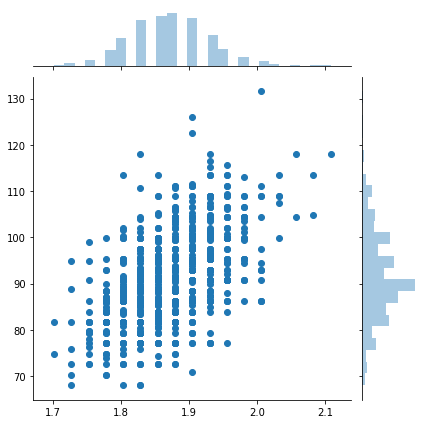

In [26]:
plt.figure(figsize=(12,8))
sns.jointplot(x=heights, y = weights)
plt.show()

In [28]:
# weights = m * heights + b

In [34]:
print(heights.shape)
print(weights.shape)

(1015, 1)
(1015, 1)


In [33]:
weights = weights.reshape(weights.size, 1)
heights = heights.reshape(weights.size, 1)

In [30]:
import sys
sys.path.insert(
    0,
    r"C:\Users\DELL\Desktop\Sentifi\machine_learning\linear_regression_from_scratch\gradient_descent",
)

In [39]:
import GD_linear_regression as glr

builder = glr.GDLinearRegression(iterations=200)
reg = builder.fit(heights, weights)
predictions = reg.predict(heights)
costs = reg.costs
thetas = reg.theta

In [40]:
print(len(costs))
print(reg.theta[-1])
print(costs[-1])

200
[[48.79217707]]
34.286653301755706


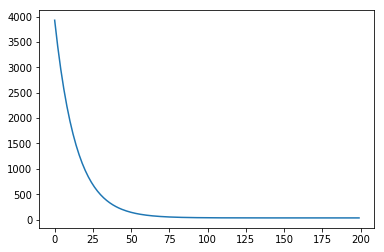

In [41]:
plt.plot(costs)
plt.show()